In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/restaurant-scores-lives-standard.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(53973, 17)

In [4]:
# типы колонок
data.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 53973


c:\django_projects\untitled\venv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\django_projects\untitled\venv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


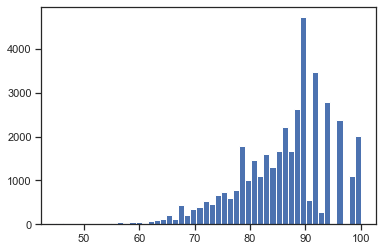

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])
plt.hist(data['inspection_score'], 50)
plt.show()

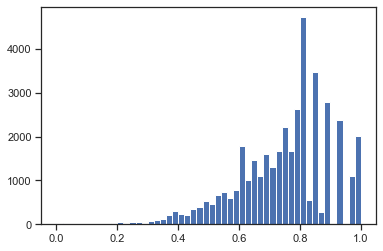

In [9]:
plt.hist(sc1_data, 50)
plt.show()

c:\django_projects\untitled\venv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\django_projects\untitled\venv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


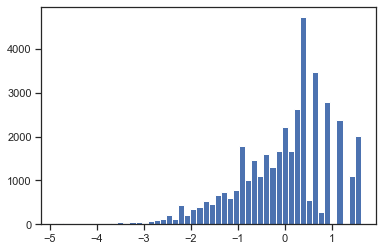

In [10]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['inspection_score']])
plt.hist(sc2_data, 50)
plt.show()

In [23]:
cat_data = np.array(data[['inspection_type']])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_enc = pd.DataFrame({'c1':cat_data.T[0]})
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

TypeError: '(['inspection_type'], ['risk_category'])' is an invalid key

In [12]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [13]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

array(['Administrative or Document Review', 'Complaint',
       'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Multi-agency Investigation',
       'New Construction', 'New Ownership', 'New Ownership - Followup',
       'Non-inspection site visit', 'Reinspection/Followup',
       'Routine - Scheduled', 'Routine - Unscheduled', 'Special Event',
       'Structural Inspection'], dtype=object)

In [14]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(53973, 1)

In [15]:
cat_enc_ohe.shape

(53973, 14)

In [16]:
cat_enc_ohe

<53973x14 sparse matrix of type '<class 'numpy.float64'>'
	with 53973 stored elements in Compressed Sparse Row format>

In [17]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [18]:
cat_enc.head(10)

,c1
0,Complaint
1,Routine - Unscheduled
2,Routine - Unscheduled
3,Non-inspection site visit
4,Routine - Unscheduled
5,New Ownership - Followup
6,New Ownership
7,Reinspection/Followup
8,Routine - Unscheduled
9,Routine - Unscheduled


In [19]:
pd.get_dummies(cat_enc, dummy_na=True).head()

,c1_Administrative or Document Review,c1_Complaint,c1_Complaint Reinspection/Followup,c1_Foodborne Illness Investigation,c1_Multi-agency Investigation,c1_New Construction,c1_New Ownership,c1_New Ownership - Followup,c1_Non-inspection site visit,c1_Reinspection/Followup,c1_Routine - Scheduled,c1_Routine - Unscheduled,c1_Special Event,c1_Structural Inspection,c1_nan
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


ValueError: Could not interpret input 'c1_Complaint'

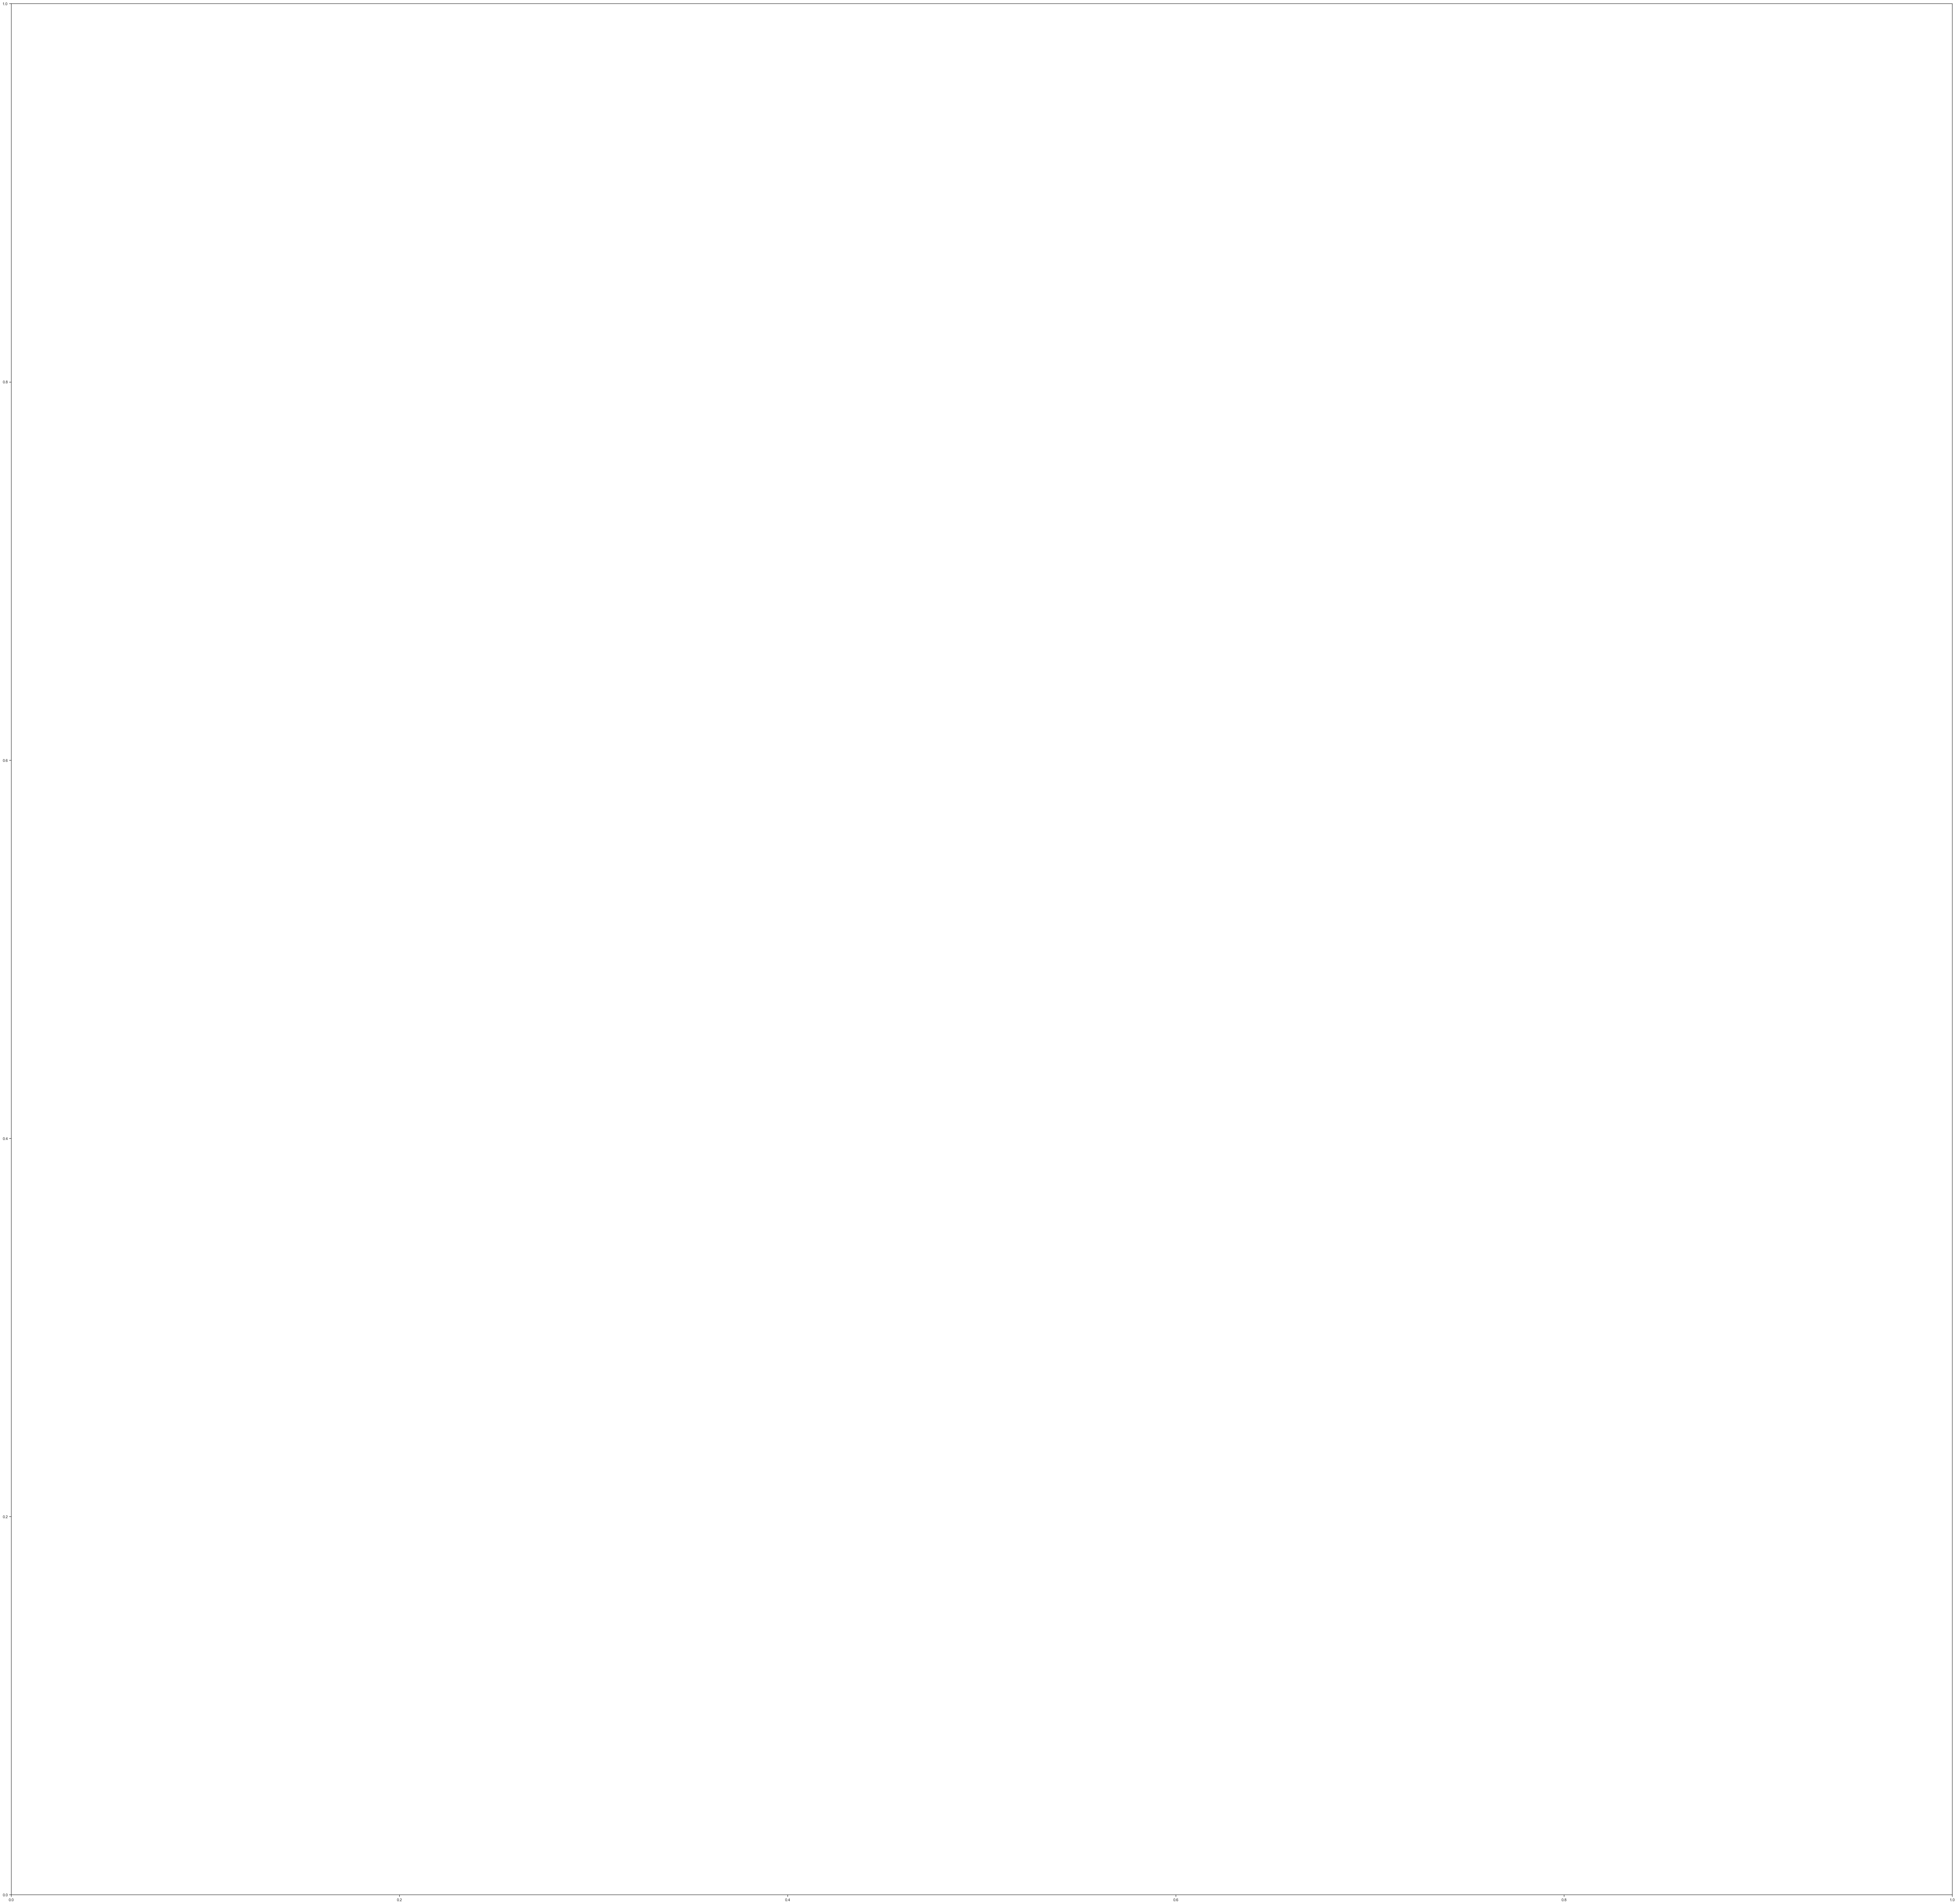

In [22]:
fig, ax = plt.subplots(figsize=(100,100)) 
sns.scatterplot(ax=ax, x='inspection_type', y='inspection_score', data=data)

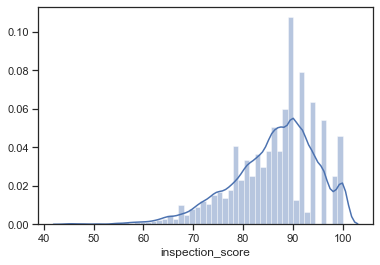

In [21]:
sns.distplot(data['inspection_score'])


